# Human Factors Prediction Model => LSTM(ASRS)

## Import Notebook

In [57]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

    print(model.classification_report)

In [59]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
asrs_df.sort_values(by='date', ascending=False, inplace=True)
asrs_df = asrs_df.head(500)

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name = 'asrs'

In [60]:
def call_modal(options):
    dfs = { ds_name: asrs_df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(ASRS) + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (500, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


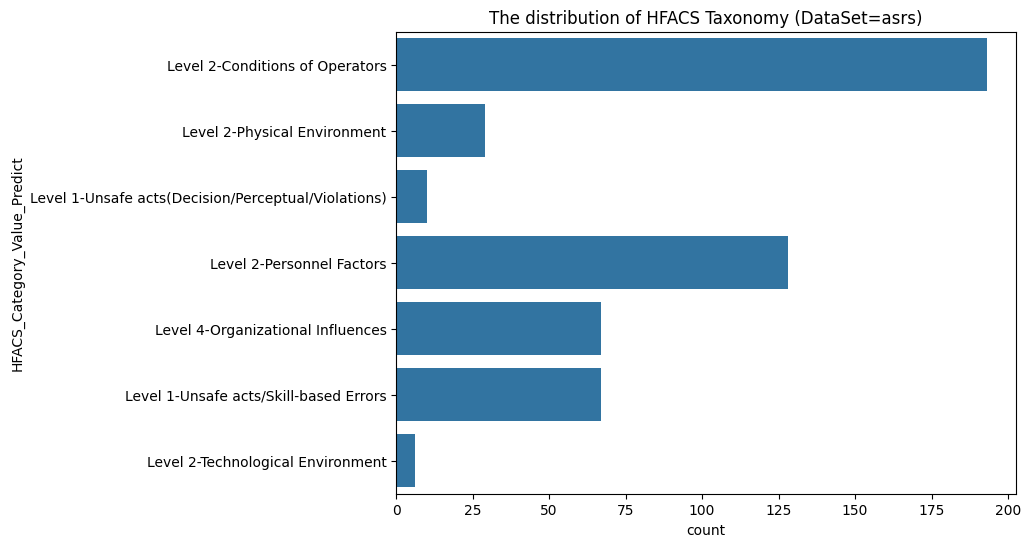

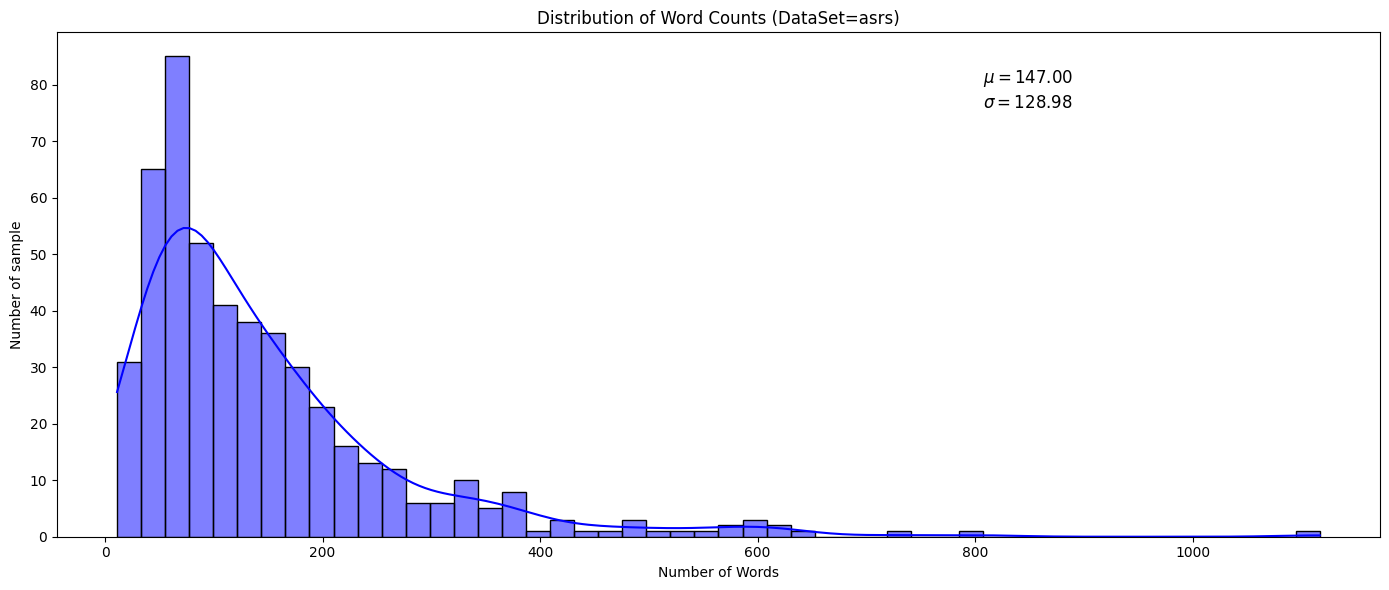

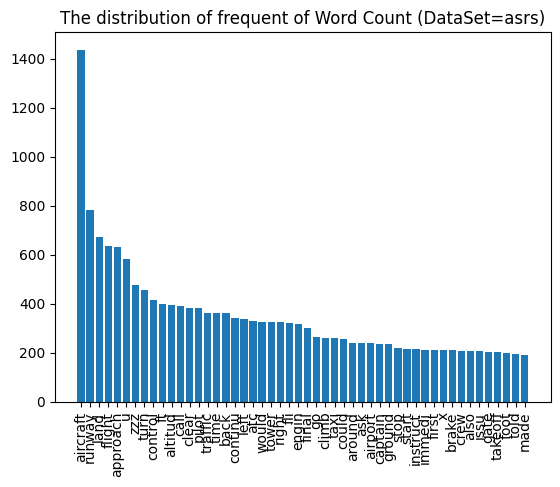

Total unique words: 5495
Define Y
Shape of label tensor: (500,)
Define X
Found 5496 unique tokens.
Shape of data tensor: (500, 200)
(400, 200) (400,)
(100, 200) (100,)
Counter({2: 149, 3: 97, 6: 62, 1: 58, 4: 22, 0: 7, 5: 5})
Counter({2: 149, 3: 97, 6: 62, 1: 58, 4: 22, 0: 7, 5: 5})
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.1767 - loss: 1.9575 - val_accuracy: 0.4000 - val_loss: 1.9495
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.3250 - loss: 1.9488 - val_accuracy: 0.4250 - val_loss: 1.9367
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.3642 - loss: 1.9339 - val_accuracy: 0.4250 - val_loss: 1.9157
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.3562 - loss: 1.9126 - val_accuracy: 0.4250 - val_loss: 1.8680
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.3596 - loss: 1.8574 - val_accuracy: 0.4250 - val_loss: 1.6835
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.3705 - los

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


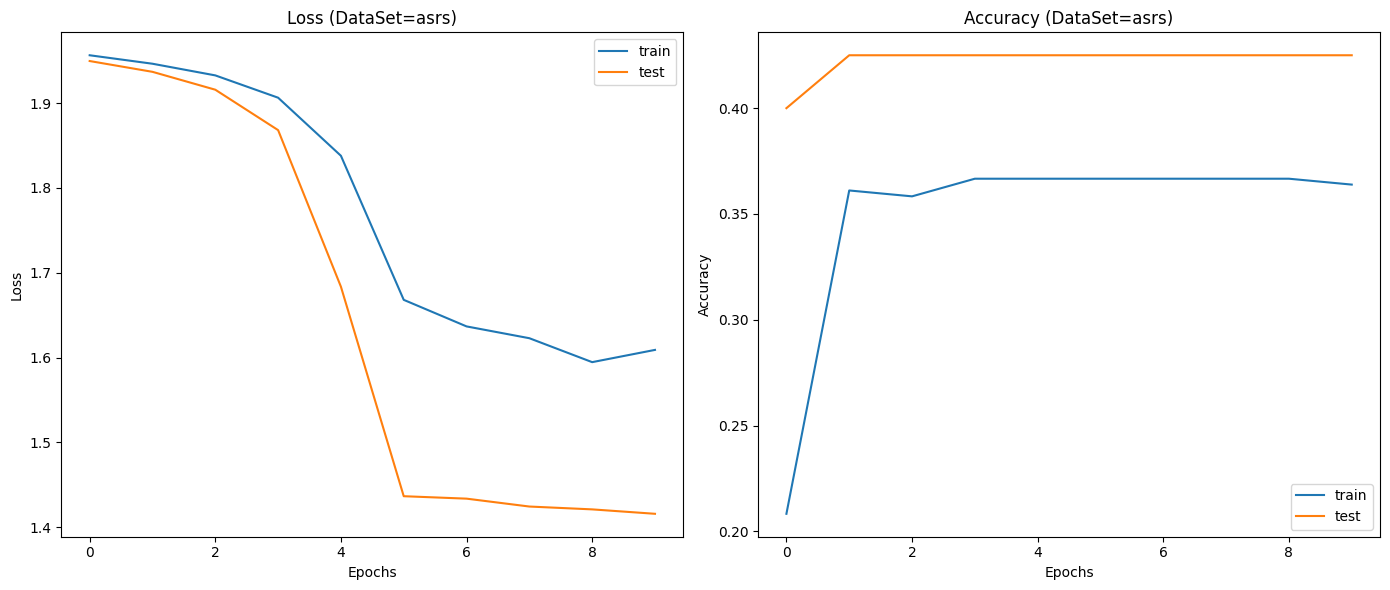

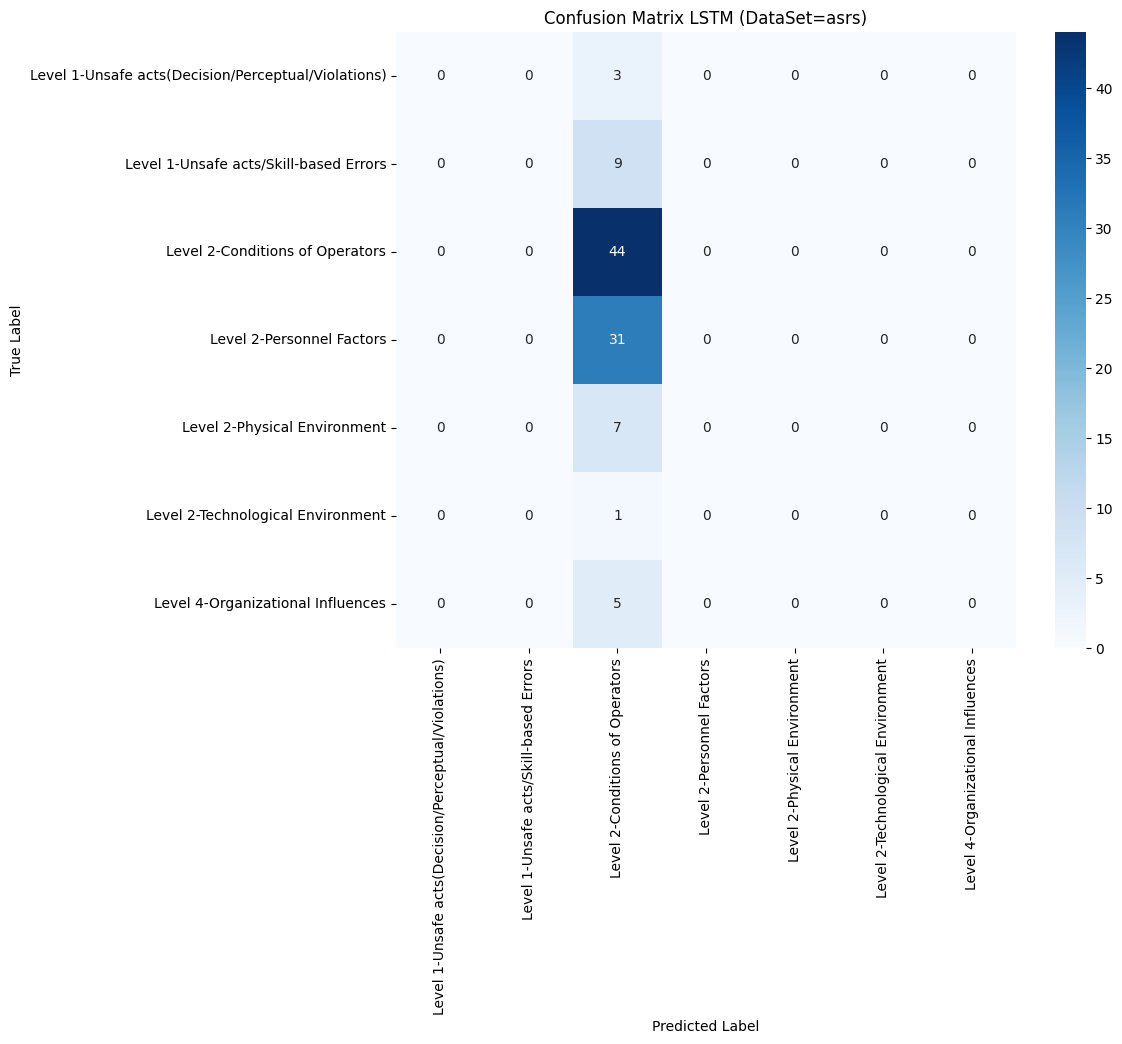

In [61]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model = call_modal(options)

## LSTM(ASRS) + LS(Hybrid) + Class Weight

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (500, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


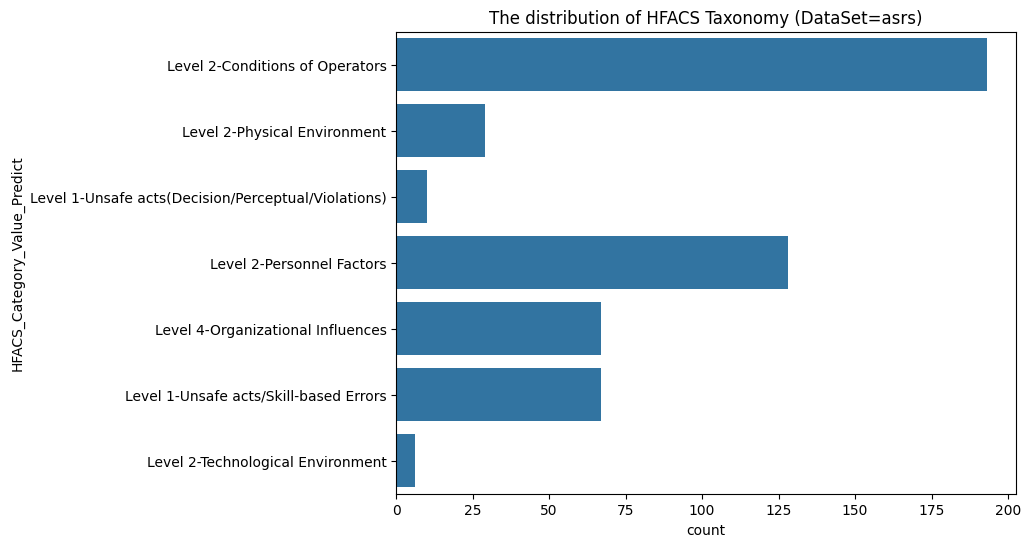

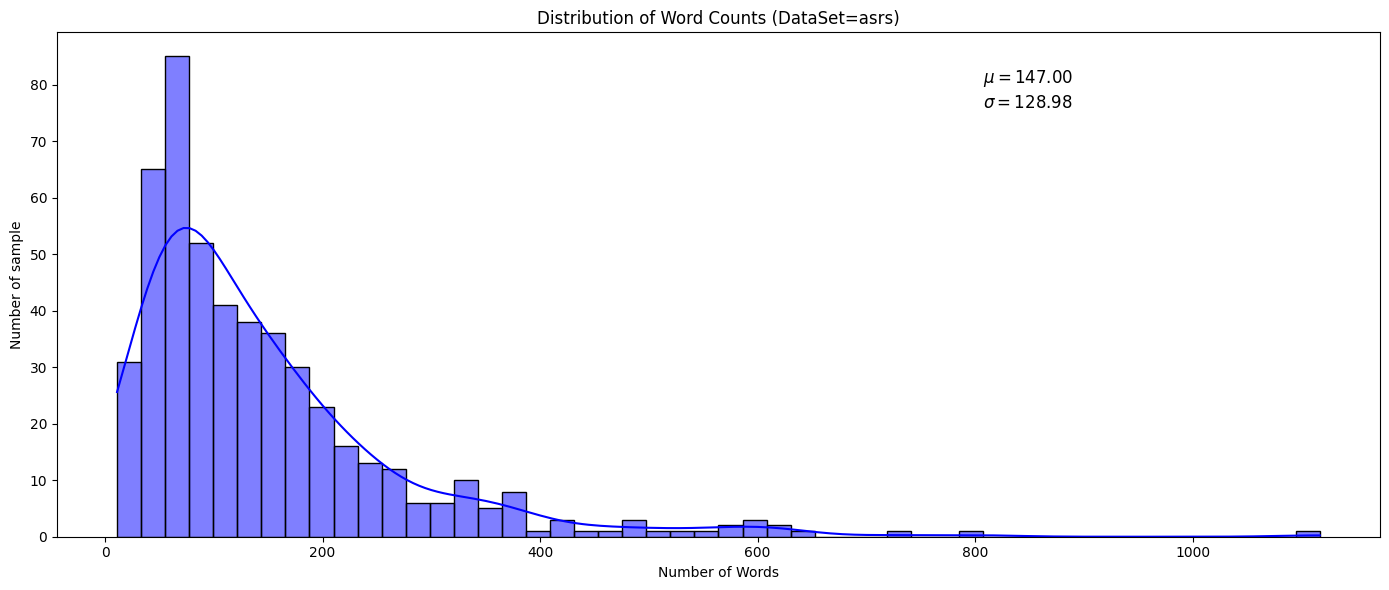

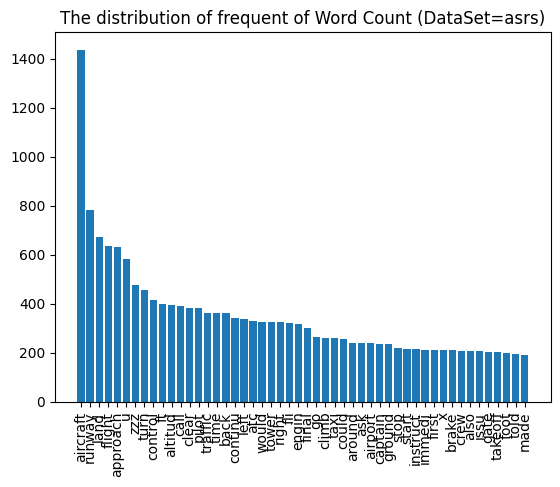

Total unique words: 5495
Define Y
Shape of label tensor: (500,)
Define X
Found 5496 unique tokens.
Shape of data tensor: (500, 200)
(400, 200) (400,)
(100, 200) (100,)
Counter({2: 149, 3: 97, 6: 62, 1: 58, 4: 22, 0: 7, 5: 5})
Counter({2: 149, 3: 97, 6: 62, 1: 58, 4: 22, 0: 7, 5: 5})
{0: 8.16326530612245, 1: 0.9852216748768473, 2: 0.3835091083413231, 3: 0.5891016200294551, 4: 2.5974025974025974, 5: 11.428571428571429, 6: 0.9216589861751152}
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.1455 - loss: 2.0516 - val_accuracy: 0.2000 - val_loss: 1.9600
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.1287 - loss: 1.8804 - val_accuracy: 0.1500 - val_loss: 1.9601
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.1470 - loss: 1.8329 - val_accuracy: 0.1250 - val_loss: 1.9607
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.1640 - loss: 1.7874 - val_accuracy: 0.1000 - val_loss: 1.9617
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
Accur

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


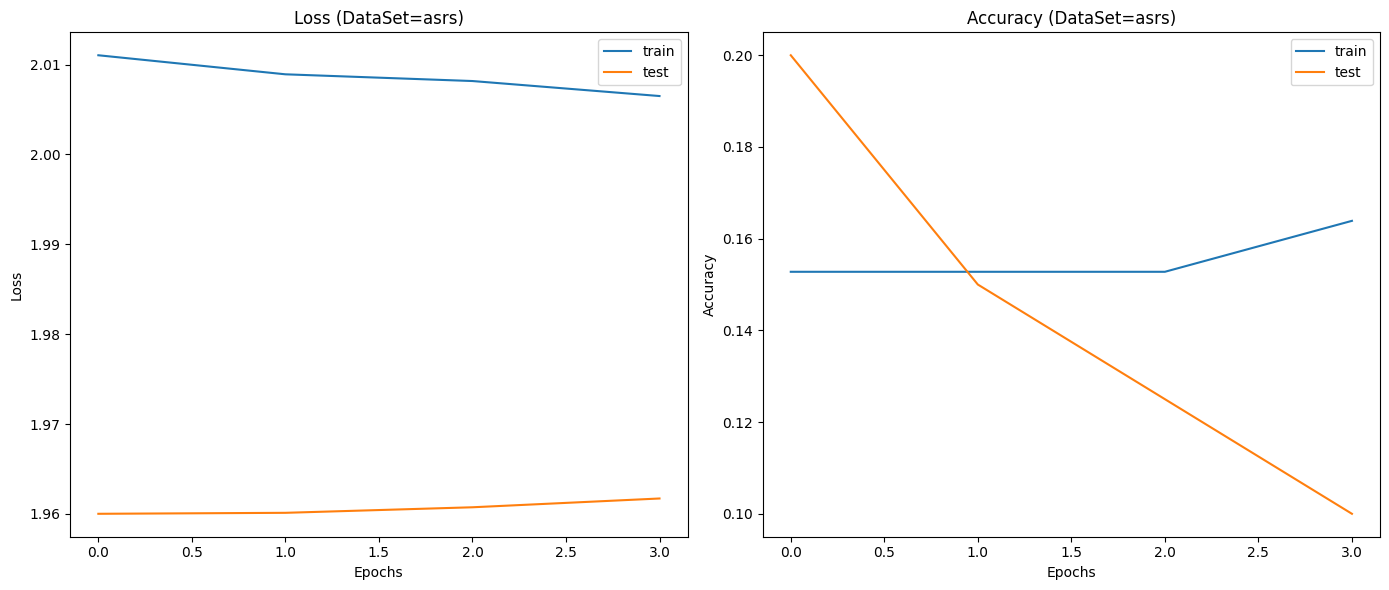

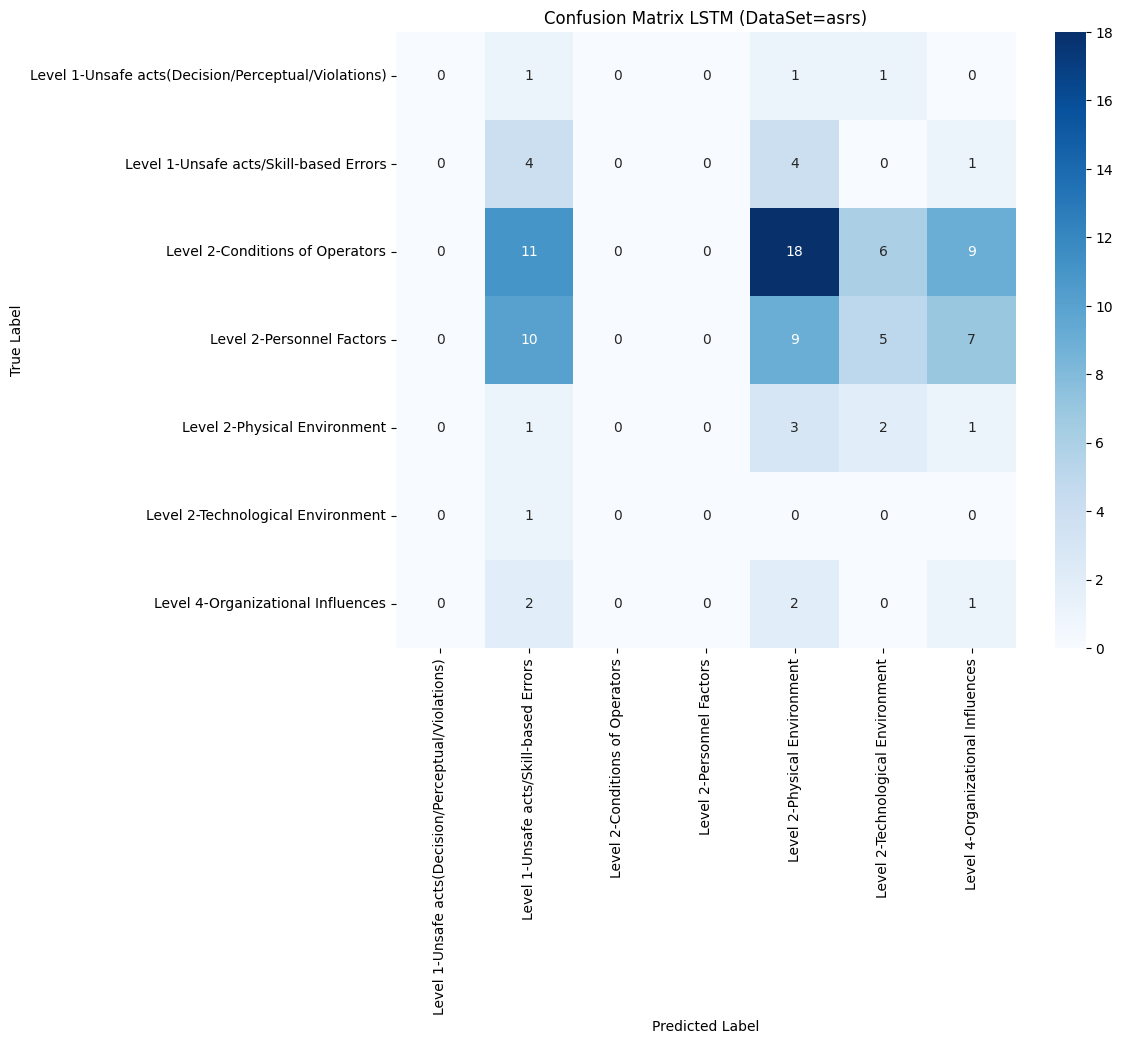

In [62]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model_weight = call_modal(options)

## LSTM(ASRS) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (500, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


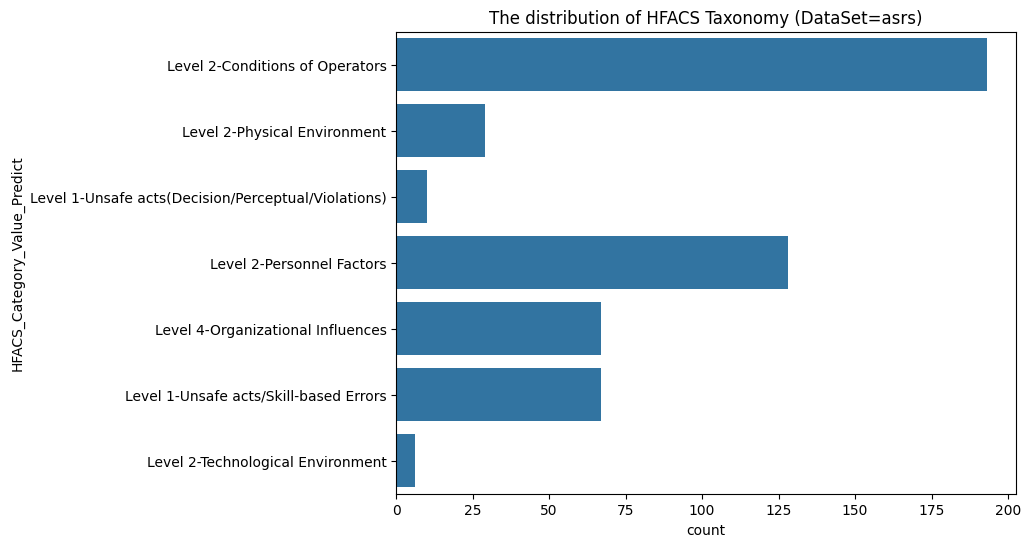

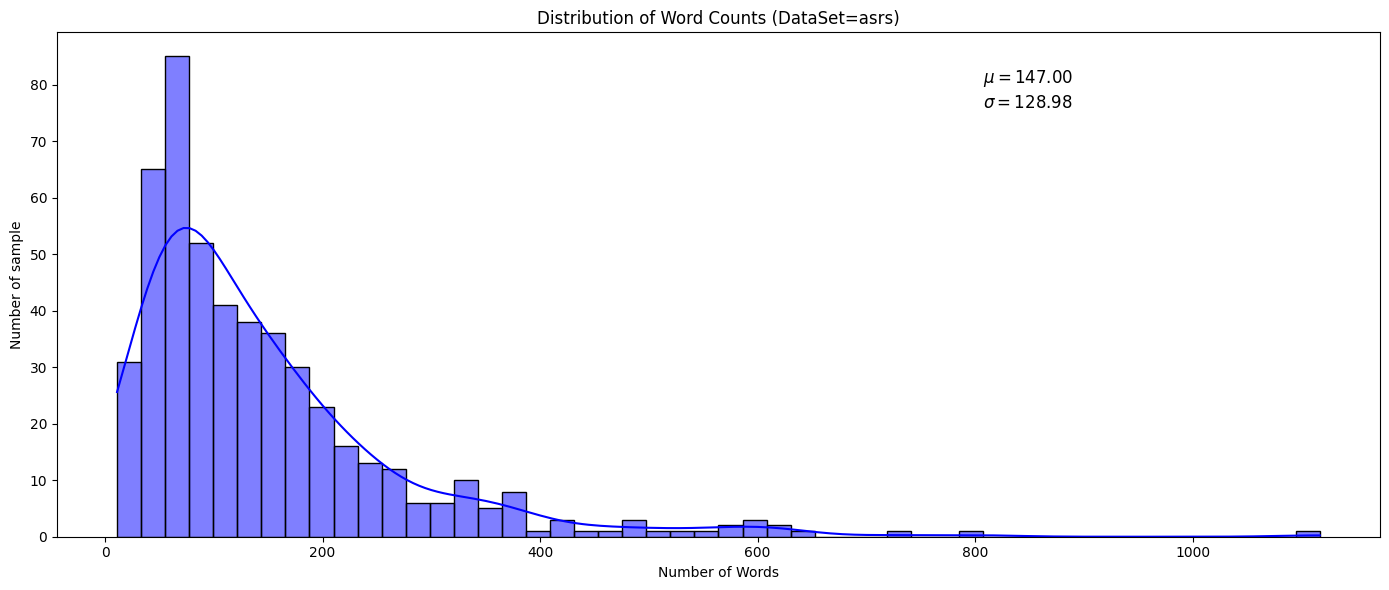

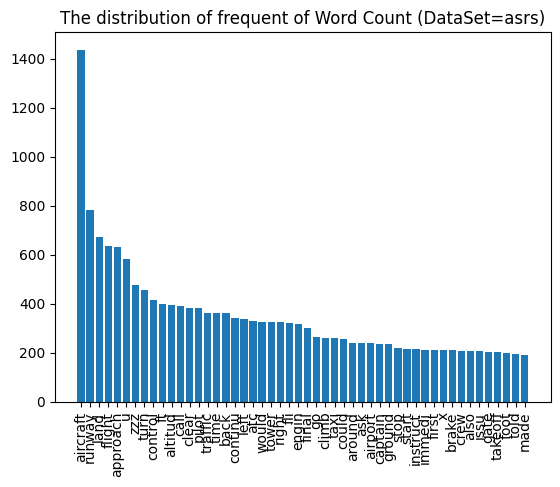

Total unique words: 5495
Define Y
Shape of label tensor: (500,)
Define X
Found 5496 unique tokens.
Shape of data tensor: (500, 200)
(400, 200) (400,)
(100, 200) (100,)
Counter({2: 149, 3: 97, 6: 62, 1: 58, 4: 22, 0: 7, 5: 5})


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5

In [63]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model_smote = call_modal(options)

## LSTM(ASRS)+LS(Hybrid)+ASASYN

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (1000, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


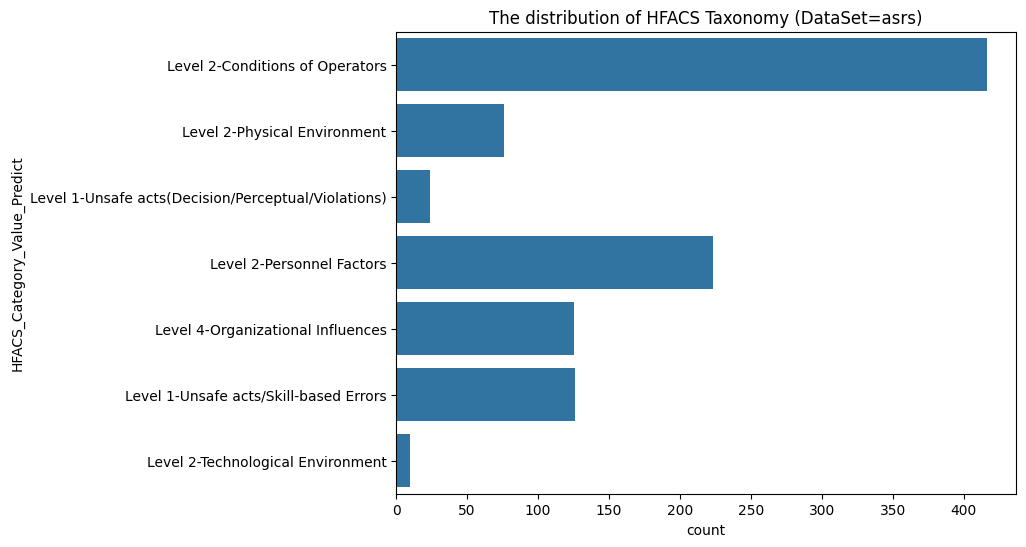

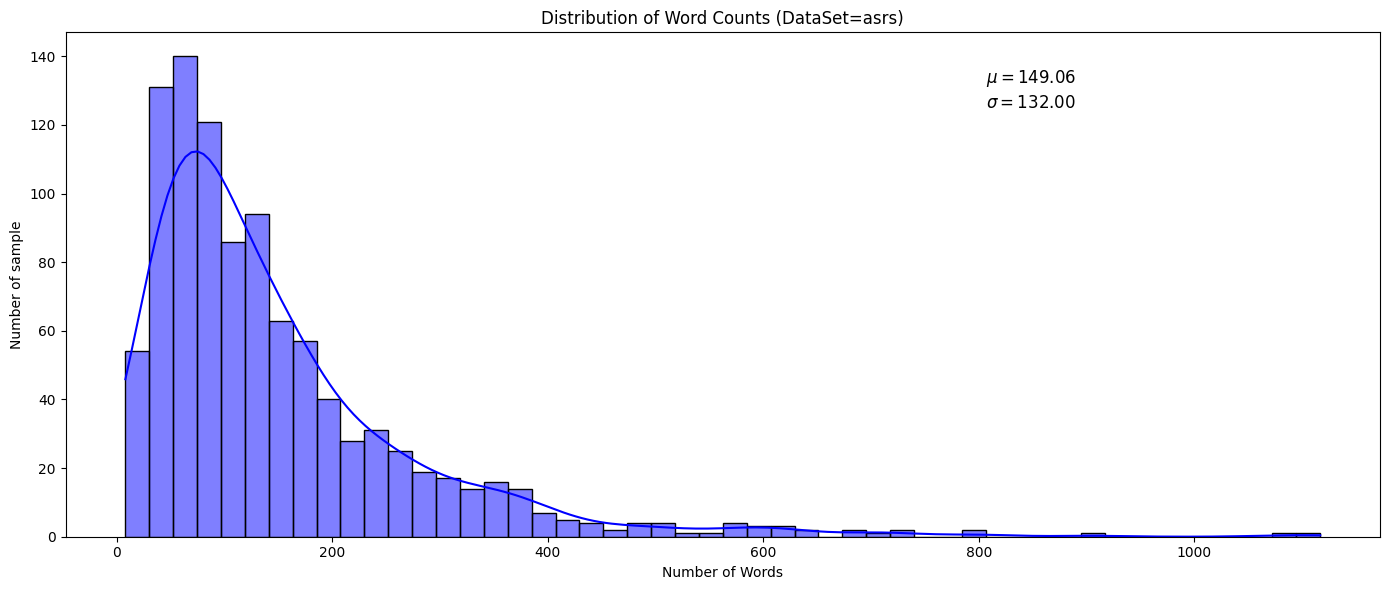

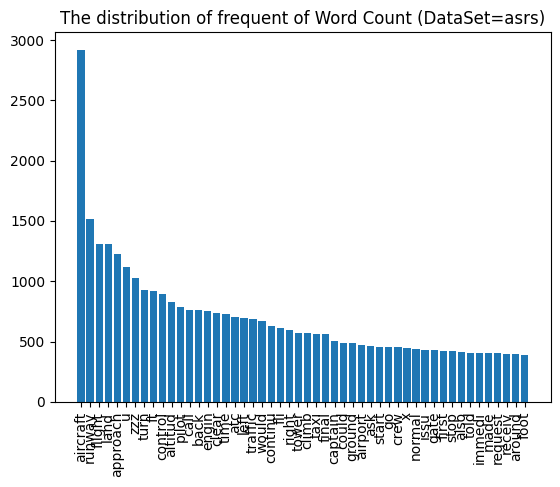

Total unique words: 7934
Define Y
Shape of label tensor: (1000,)
Define X
Found 7935 unique tokens.
Shape of data tensor: (1000, 200)
(800, 200) (800,)
(200, 200) (200,)
Counter({2: 336, 3: 179, 6: 103, 1: 95, 4: 59, 0: 19, 5: 9})
Original dataset shape: (800, 200)
Resampled dataset shape: (1124, 200)
Counter({2: 336, 5: 333, 3: 179, 6: 103, 1: 95, 4: 59, 0: 19})
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 304ms/step - accuracy: 0.2514 - loss: 1.9543 - val_accuracy: 0.0000e+00 - val_loss: 1.9327
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.3310 - loss: 1.9131 - val_accuracy: 0.0000e+00 - val_loss: 1.7143
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 305ms/step - accuracy: 0.3069 - loss: 1.7774 - val_accuracy: 0.0000e+00 - val_loss: 1.5460
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.3175 - loss: 1.7372 - val_accuracy: 0.0000e+00 - val_loss: 1.5369
Epoch 5/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.3352 - loss: 1.7035

KeyboardInterrupt: 

In [42]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [64]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS+LS(Hybrid)=========
Accuracy: 44.00
Micro F1 Score: 44.00
Macro F1 Score: 8.73
Weighted F1 Score: 26.89
Hamming Loss: 0.5600
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         9
           2       0.44      1.00      0.61        44
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5

    accuracy                           0.44       100
   macro avg       0.06      0.14      0.09       100
weighted avg       0.19      0.44      0.27       100

ASRS+LS(Hybrid)+Class Imbalance=========
Accuracy: 8.00
Micro F1 Score: 8.00
Macro F1 Score: 6.07
Weighted F1 Score: 3.22
Hamming Loss: 0.9200
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.

AttributeError: 'tuple' object has no attribute 'Y_test'

## References

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html